In [64]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from AnalyticFormulas import MertonJumpDiffusionPrice
from OptionPricing import MertonModel, BlackScholesModel
plt.style.use('seaborn')

In [77]:
r = 0.05
sigma = 0.15
lam = 2
mu_j = 0.
sig_j = 0.1
T = 1
s = 100

In [78]:
mertonModel = MertonModel(lam, mu_j, sig_j, sigma, r, s, T)
strikes = np.linspace(5, 150, 1000)
def call(x, strike): return np.maximum(x - strike, 0)
calls = [partial(call, strike=k) for k in strikes]
mcPrices = mertonModel.OptionPricePayOffRangeMC(calls, s, T)
analyticPrices = [MertonJumpDiffusionPrice(s, r, sigma, T, k, mu_j, sig_j, lam, 100) for k in strikes]

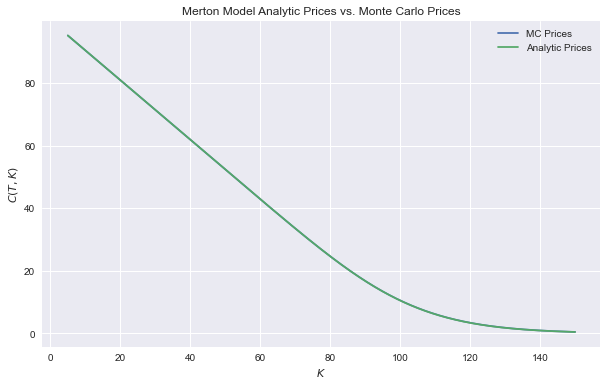

In [79]:
plt.figure(figsize=(10,6))
plt.plot(strikes, mcPrices, label='MC Prices')
plt.plot(strikes, analyticPrices, label='Analytic Prices')
plt.xlabel('$K$')
plt.ylabel('$C(T,K)$')
plt.title('Merton Model Analytic Prices vs. Monte Carlo Prices')
plt.legend()

In [83]:
s0 = 100
discountetVals = mertonModel.generateValues(1000000, x0=s0) * np.exp(-mertonModel.T * mertonModel.r)
print('Merton Jump Diffusion Model\n')
print('Difference between discounted asset value and s0 (should be zero):')
print(s0 - discountetVals.mean())
print('Standard dev of discounted payoff')
print(discountetVals.std())

Merton Jump Diffusion Model

Difference between discounted asset value and s0 (should be zero):
-0.03979522696411664
Standard dev of discounted payoff
20.900571046772825


In [84]:
sig_bs = 0.2

bsModel = BlackScholesModel(sig_bs, r, s, T)
discountetVals = bsModel.generateValues(1000000, x0=100) * np.exp(-bsModel.T * bsModel.r)
print('Black Scholes Model\n')
print('Difference between discounted asset value and s0 (should be zero):')
print(s0 - discountetVals.mean())
print('Standard dev of discounted payoff')
print(discountetVals.std())

Black Scholes Model

Difference between discounted asset value and s0 (should be zero):
-0.0035539611491657297
Standard dev of discounted payoff
20.184032770499435


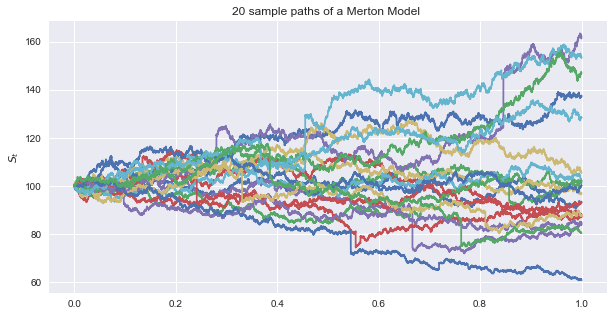

In [89]:
mertonModel.plotPaths(nPaths=20)

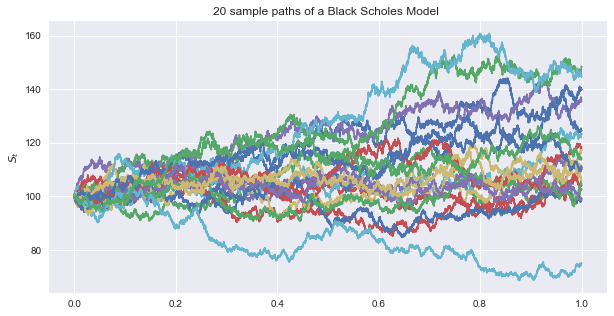

In [90]:
bsModel.plotPaths(nPaths=20)